<a href="https://colab.research.google.com/github/michaelchapa/ai_machineLearning_assign3/blob/master/CS3793_5233_assignment3_dvo473.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UTSA CS 3793/5233: Assignment-3

Summer 2020


**Chapa - Michael - (dvo473)**






## Learning Objectives

Implement 2 different machine learning algorithms
*   Stochastic Gradient Descent
*   ID3 Decision Tree



## Description

This assignment is focused on **machine learning**, mainly on the implementation of 2 different algorithms - Stochastic Gradient Descent & ID3 decision tree. 
The assignment is divided into two sections, each for one unique ML algorithm. 

The base structure and comments are provided on what should be done. You can use some libraries that help support you for the successful completion of the assignment. However, you **CANNOT** use a complete library that contains the implementation of ML algorithms. You can get pieces of code from online, but please cite the source properly.


##Import Libraries

Write all the import statements here. This should be for both algorithm implmentations. As mentioned before, you can not use any premade ML libraries.

In [15]:
# import all required libraries
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

#Stochastic Gradient Descent

In this section, you will implement the Stochastic Gradient Descent algorithm. The training is for a **binary classification** task i.e. each instance will have a class value of 0 or 1. Also, assume that you are given **all binary-valued attributes** and that there are **no missing values** in the train or test data. 


##Algorithm

(40 points)

Following are the data files that will be provided to you for the gradient descent algorithm implementation.

*   Training file - 'gd-train.dat'
*   Testing file - 'gd-test.dat'

*Both these files should be present in the same folder as this code file.* In these files, only non-space characters are relevant. The first line contains the attribute names. All the other lines are different example instances to be used for the algorithm. Each column holds values of the attributes, whereas the last column holds the class label for that instance.

Write the code in the following code block, structure is provided. Instructions on the steps to follow are provided as comments.



In [16]:
# utility fxn, determines if prediction is a 1 or 0
def threshold(y_pred):
    if y_pred >= 0.5:
        return 1.0
    else:
        return 0.0

# Load data
trainingData = np.loadtxt("https://raw.githubusercontent.com/michaelchapa/" \
                          "ai_machineLearning_assign3/master/gd-train.dat", skiprows = 1)
testData = np.loadtxt("https://raw.githubusercontent.com/michaelchapa/" \
                      "ai_machineLearning_assign3/master/gd-test.dat", skiprows = 1)

rows, attributes = trainingData.shape # attributes = columns
rows2, attributes2 = testData.shape

# Get all Learning Rates, from 0.05 to 1 (inclusive)
alphas = []
accuracyTrain = []
accuracyTest = []
alpha = 0.05
while alpha <= 1.05:
    alphas.append(alpha)
    alpha += 0.05

# Learn for each learning rate, print results, do it again
for alpha in alphas:
    weights = np.zeros(attributes - 1) # weights initialized to 0
    
    # Train the weights
    for instance in trainingData: # each row in the data
        y_pred = np.dot(weights, instance[0:-1]) # make y prediction
        error = y_pred - instance[-1]
        
        # update each weight
        for j in range(0, 13): 
            weights[j] = weights[j] - alpha * error * instance[j]
    
    # Check accuracy on trainingData
    correctCount = 0
    for instance in trainingData:
        y_pred = np.dot(weights, instance[0:-1]) # predict
        y_pred = threshold(y_pred)
        
        if y_pred == instance[-1]:
            correctCount += 1
        
    accuracy = (correctCount / rows) * 100.0
    accuracyTrain.append(accuracy)
    print("Accuracy for LR of %.2lf on Training set = %.0lf" \
          % (alpha, accuracy), end = "%\n")
    
    # Check accuracy on testData
    correctCount = 0
    for instance in testData:
        y_pred = np.dot(weights, instance[0:-1])
        y_pred = threshold(y_pred)
        
        if y_pred == instance[-1]:
            correctCount += 1
            
    accuracy = (correctCount / rows2) * 100.0
    accuracyTest.append(accuracy)
    print("Accuracy for LR of %.2lf on Testing set =  %.0lf" \
          % (alpha, accuracy), end = "%\n")
        
    print()


Accuracy for LR of 0.05 on Training set = 69%
Accuracy for LR of 0.05 on Testing set =  71%

Accuracy for LR of 0.10 on Training set = 68%
Accuracy for LR of 0.10 on Testing set =  70%

Accuracy for LR of 0.15 on Training set = 71%
Accuracy for LR of 0.15 on Testing set =  67%

Accuracy for LR of 0.20 on Training set = 68%
Accuracy for LR of 0.20 on Testing set =  64%

Accuracy for LR of 0.25 on Training set = 69%
Accuracy for LR of 0.25 on Testing set =  70%

Accuracy for LR of 0.30 on Training set = 68%
Accuracy for LR of 0.30 on Testing set =  72%

Accuracy for LR of 0.35 on Training set = 35%
Accuracy for LR of 0.35 on Testing set =  35%

Accuracy for LR of 0.40 on Training set = 70%
Accuracy for LR of 0.40 on Testing set =  67%

Accuracy for LR of 0.45 on Training set = 32%
Accuracy for LR of 0.45 on Testing set =  28%

Accuracy for LR of 0.50 on Training set = 32%
Accuracy for LR of 0.50 on Testing set =  28%

Accuracy for LR of 0.55 on Training set = 32%
Accuracy for LR of 0.55 

##Extra Credit - Accuracy Plots

(5 points)

Use the above accuracy results on the training and testing data and write code to plot the graphs as mentioned in the code block below.



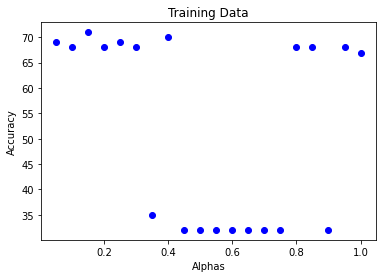

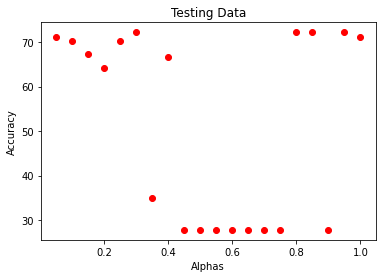

In [17]:
# plot Train
f, ax = plt.subplots()
ax.set_title("Training Data")
ax.set_xlabel("Alphas")
ax.set_ylabel("Accuracy")
plt.scatter(alphas, accuracyTrain, color='blue')

# plot Test
f, ax = plt.subplots()
ax.set_title("Testing Data")
ax.set_xlabel("Alphas")
ax.set_ylabel("Accuracy")
plt.scatter(alphas, accuracyTest, color='red')


#ID3 Decision Tree

In this section, you will implement the ID3 Decision Tree algorithm. The training is for a **binary classification** task i.e. each instance will have a class value of 0 or 1. Also, assume that you are given **all binary-valued attributes** and that there are **no missing values** in the train or test data. 


##Algorithm

(80 points)

Following are the data files that will be provided to you for the ID3 algorithm implementation.

*   Training file - 'id3-train.dat'
*   Testing file - 'id3-test.dat'

*Both these files should be present in the same folder as this code file.* In these files, only non-space characters are relevant. The first line contains the attribute names. All the other lines are example instances to be used for the algorithm. Each column holds values of the attributes, whereas the last column holds the class label for that instance.

In a decision tree, if you reach a leaf node but still have examples that belong to different classes, then choose the most frequent class (among the instances at the leaf node). If you reach a leaf node in the decision tree and have no examples left or the examples are equally split among multiple classes, then choose the class that is most frequent in the entire training set. You do not need to implement pruning. Also, don’t forget to use logarithm base 2 when computing entropy and set (0 log 0) to 0.

Write the code in the following code block, structure is provided. Instructions on the steps to follow are provided as comments. The code should output the following 3 things:

*   Print the Decision Tree created, in the following example format:

    ```
    attr1 = 0 :
        attr2 = 0 :
            attr3 = 0 : 1
            attr3 = 1 : 0
        attr3 = 1 :
            attr4 = 0 : 0
            attr4 = 1 : 1
    attr1 = 1 :
        attr2 = 1 : 1

    ```

*   Accuracy on the Training data = x %
*   Accuracy on the Test data = x %





In [18]:

# returns tuple of avg/conditional entropy of given feature & class to split on
def Entropy_Feature(feature, target):
    zz = zo = oz = oo = 0
    
    zipped = zip(feature, target)
    for tuple in zipped:
        if tuple == (0.0, 0.0):
            zz += 1
        elif tuple == (0.0, 1.0): # y -> we play
            zo += 1
        elif tuple == (1.0, 0.0):
            oz += 1
        elif tuple == (1.0, 1.0): # x -> we play 
            oo += 1
    
    ztotal = zo + zz
    ototal = oo + oz
    
    entropy1 = ((-1 * (oo/ ototal)) * math.log((oo/ ototal), 2)) + \
        ((-1 * (oz/ ototal)) * math.log((oz/ ototal), 2)) 
        
    entropy0 = ((-1 * (zo/ ztotal)) * math.log((zo/ ztotal), 2)) + \
        ((-1 * (zz/ ztotal)) * math.log((zz/ ztotal), 2)) 
        
    averageEntropy1 = entropy1 * (ototal / (ototal + ztotal))
    averageEntropy0 = entropy0 * (ztotal / (ototal + ztotal))
    averageEntropy = averageEntropy1 + averageEntropy0
    
    if averageEntropy1 < averageEntropy0:
        return averageEntropy, 1
    else:
        return averageEntropy, 0

def Entropy_Target(target):
    hits = target.sum()
    total = len(target)
    ratio = hits/ total
    antiRatio = (total - hits) / total
    return ((-1 * ratio) * math.log(ratio, 2)) + \
        ((-1 * antiRatio) * math.log(antiRatio, 2))

def Information_Gain(entropies):
    # get min entropy from list
    minEntropy, route = min((x, y) for x, y in entropies)
    minEntropyIndex = [x[0] for x in entropies].index(minEntropy)
    
    return minEntropyIndex, route
            
def RemoveColumn(index, data):
    # remove column based on index
    df = pd.DataFrame(data = data)
    df = df.drop(index, axis = 1) # remove column
    return df.to_numpy() # convert back

def ID3(data, tabs):
    rows, columns = np.shape(data)
    target = trainData.T[-1]
    
    if columns == 2: # Feature Column left
        target = trainData.T[-1]
        features_avg_entropy = [Entropy_Feature(feature, target) for feature in data.T[:-1]]
        target_entropy = Entropy_Target(target) 
        index, route = Information_Gain(features_avg_entropy)
        print("\t" * tabs, end = "")
        print("Split at column index: " + str(index) + ", value: " + str(1))
        print("\t" * tabs, end = "")
        print("Split at column index: " + str(index) + ", value: " + str(0))
        # print("\t", features_avg_entropy)
        data = RemoveColumn(index, data)
        return
    else:
        target = trainData.T[-1]
        features_avg_entropy = [Entropy_Feature(feature, target) for feature in data.T[:-1]]
        target_entropy = Entropy_Target(target) 
        index, route = Information_Gain(features_avg_entropy)
        print("\t" * tabs, end = "")
        print("Split at column index: " + str(index) + ", value: " + str(route))
        data = RemoveColumn(index, data)
        ID3(data, tabs + 1) 
    
trainData = np.loadtxt("https://raw.githubusercontent.com/michaelchapa" \
                        "/ai_machineLearning_assign3/master/id3-train.dat", skiprows = 1)
testData = np.loadtxt("https://raw.githubusercontent.com/michaelchapa" \
                       "/ai_machineLearning_assign3/master/id3-test.dat", skiprows = 1)

ID3(trainData, 0)



Split at column index: 4, value: 0
	Split at column index: 3, value: 0
		Split at column index: 0, value: 1
			Split at column index: 2, value: 1
				Split at column index: 1, value: 0
					Split at column index: 0, value: 1
					Split at column index: 0, value: 0


##Extra Credit - Learning Curve

(10 points)

Instead of taking the entire training data (all 800 instances), loop through to select 'x' instances in the increments of 40 (i.e. 40, 80, 120, and so on). For each selected number 'x', randomly pick the example instances from the training data and call the ID3 function to create the decision tree. Calculate the accuracy of the created ID3 tree on the Test data file. Plot the corresponding graph, aka Learning Curve.


In [19]:
# Loop through to select the number of instances 'x' in increments of 40
# For each 'x',
    # Randomly select 'x' instances
    # Create the ID3 decision tree using those instances
    # Calculate the accuracy of the ID3 tree created on the Test data

# Plot the learning curve using the accuracy values
    # X-axis will be the number of training instances used for creating the tree
    # Y-axis will be the accuracy in % on the Test data




#Submission Instructions



1.   Complete all tasks above.
2.   Export this notebook as .ipynb
      (File > Download as ipynb)
3.   Upload the .ipynb file on Blackboard



##Rubric

*   (40 points) Gradient Descent Algorithm
*   (05 points) Extra Credit - GD Accuracy Plots
*   (80 points) ID3 Algorithm
*   (10 points) Extra Credit - ID3 Learning Curve



